                             Sobre o conjunto de dados

Visão geral:
Este conjunto de dados inclui dados para a estimativa dos níveis de obesidade em indivíduos dos países do México, Peru e Colômbia, com base em seus hábitos alimentares e condição física.
Os dados contêm 17 atributos e 2111 registros, os registros são rotulados com a variável de classe NObesity (Nível de obesidade), que permite a classificação dos dados usando os valores de Peso insuficiente, Peso normal, Sobrepeso nível I, Sobrepeso nível II, Obesidade tipo I, Obesidade tipo II e Obesidade tipo III.

                        Detalhes da base de dadosDetalhes dos dados:

Gênero: Gênero
Idade: Idade
Altura: em metros
Peso: em kgs
family_history: Algum membro da família sofreu ou sofre de excesso de peso?
FAVC: Você come alimentos altamente calóricos com frequência?
FCVC: Você costuma comer vegetais nas suas refeições?
NCP: Quantas refeições principais você faz diariamente?
CAEC: Você come alguma coisa entre as refeições?
FUMAÇA: Você fuma?
CH2O: Quanta água você bebe diariamente?
SCC: Você monitora as calorias que ingere diariamente?
FAF: Com que frequência você pratica atividade física?
TER: Quanto tempo você usa dispositivos tecnológicos como celular, videogame, televisão, computador e outros?
CALC: Com que frequência você bebe álcool?
MTRANS: Qual meio de transporte você costuma usar?
Nível de obesidade (coluna alvo): Nível de obesidade


Import das bibliotecas necessárias para a análise

In [1]:
# Import da biblioteca que irá acessar e manipular os dados
import pandas as pd

# Import da biblioteca que irá manipular, exibir e criar gráficos
import matplotlib.pyplot as plt

# Import da bivlioteca que irá possibilitar a criação de vários
# tipos de gráficos (é baseado no matplotlib)
import seaborn as sns

# Import da biblioteca que serve para manipular e
# realizar operações com arrays

import numpy as np

# import da biblioteca que administra warnings
import warnings

warnings.filterwarnings('ignore')

Acessando a base de dados

In [2]:
base_dados = pd.read_csv('Obesity prediction.csv')

Analisando as 10 primeiras linhas

In [3]:
base_dados.head(10)

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II
5,Male,29.0,1.62,53.0,no,yes,2.0,3.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Automobile,Normal_Weight
6,Female,23.0,1.50,55.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,0.0,Sometimes,Motorbike,Normal_Weight
7,Male,22.0,1.64,53.0,no,no,2.0,3.0,Sometimes,no,2.0,no,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
8,Male,24.0,1.78,64.0,yes,yes,3.0,3.0,Sometimes,no,2.0,no,1.0,1.0,Frequently,Public_Transportation,Normal_Weight
9,Male,22.0,1.72,68.0,yes,yes,2.0,3.0,Sometimes,no,2.0,no,1.0,1.0,no,Public_Transportation,Normal_Weight


Para facilitar o trabalho, vamos renomear as colunas da tabela

In [4]:
base_dados.rename(columns={
    
    'Gender': 'Genero',
    'Age': 'Idade',
    'Height': 'Altura',
    'Weight': 'Peso',
    'family_history':'Historico_Familiar',
    'FAVC': 'Frequencia_em_alimentos_caloricos',
    'FCVC': 'Come_vegetais_nas_refeiçoes',
    'NCP': 'Quant_refeiçoes_principais',
    'CAEC':'Come_algo_entre_as_refeiçoes',
    'SMOKE': 'Fuma',
    'CH2O': 'Quant_agua_ingerida_diariamente',
    'SCC': 'Monitora_calorias_diariamente',
    'FAF': 'Frequencia_de_atividade_fisica',
    'TUE': 'Tempo_em_dispositivos_eletronicos',
    'CALC':'Frequencia_que_ingere_alcool',
    'MTRANS': 'Transporte_utilizado',
    'Obesity': 'Nivel_Obesidade'
    
    
}, inplace=True)

Verificando se as colunas foram alteradas

In [5]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Verificando o tipo de cada tabela

In [6]:
base_dados.dtypes

Genero                                object
Idade                                float64
Altura                               float64
Peso                                 float64
Historico_Familiar                    object
Frequencia_em_alimentos_caloricos     object
Come_vegetais_nas_refeiçoes          float64
Quant_refeiçoes_principais           float64
Come_algo_entre_as_refeiçoes          object
Fuma                                  object
Quant_agua_ingerida_diariamente      float64
Monitora_calorias_diariamente         object
Frequencia_de_atividade_fisica       float64
Tempo_em_dispositivos_eletronicos    float64
Frequencia_que_ingere_alcool          object
Transporte_utilizado                  object
Nivel_Obesidade                       object
dtype: object

Verificando a quantidade de valores nulos

In [7]:
base_dados.isnull().sum()

Genero                               0
Idade                                0
Altura                               0
Peso                                 0
Historico_Familiar                   0
Frequencia_em_alimentos_caloricos    0
Come_vegetais_nas_refeiçoes          0
Quant_refeiçoes_principais           0
Come_algo_entre_as_refeiçoes         0
Fuma                                 0
Quant_agua_ingerida_diariamente      0
Monitora_calorias_diariamente        0
Frequencia_de_atividade_fisica       0
Tempo_em_dispositivos_eletronicos    0
Frequencia_que_ingere_alcool         0
Transporte_utilizado                 0
Nivel_Obesidade                      0
dtype: int64

Verificando a quantidade de linhas e colunas da tabela

In [8]:
base_dados.shape

(2111, 17)

                                     ANÁLISE DESCRITIVA

Medidas de tendência central: Calcular a média, mediana e a moda para variáveis numéricas como idade, altura, peso, quantidade de refeições principais, quantidade de água ingerida diaramente e tempo em dispositivos eletrônicos

Média: média aritmética dos valores da coluna

Moda: Valor que aparece com mais frequência em um conjunto de valores

mediana: Valor que se encontra no centro de um conjunto de valores.

Visualizando novamente os nomes das colunas para facilitar a criação da solução

In [9]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

primeiro, vamos criar uma função para facilitar o nosso processo, já que, com a
criação dela, não precisaremos repetir o processo várias vezes

In [10]:
# A função terá como objetivo mostrar no console a média, a mediana e a moda
# de cada coluna. A função ira receber como parametro o nome da coluna que 
# terá os valores impressos

# Criação da função que ira imprimir os valores
def imprimirValores(coluna):
    
    # impressão dos valores
    
    # Name: Ira mostrar o nome da coluna informada nos colchetes da base de dados
    
    # round: Serve para arredontar os valores. Basicamente, ele analisa se o primeiro
    # valor após a virgula é menor ou maior que 5, se for maior ele arredonta pra cima,
    # se for menor que 5 ele arredonta pra baixo. A função recebe 2 valores o valor e 
    # a quatidade de casas decimais que devem aparecer após a virgula.
    
    # mean: Cálcula a média dos valores
    
    # median: calcula a mediana dos valores
    
    # mode: Cálcula a moda dos valores. Ira retorna 2 valores: o indice da moda 
    # (pois pode haver mais de uma moda) e o valor da moda em si
    
    print("Média dos valores da coluna de ", base_dados[coluna].name,": ", round(base_dados[coluna].mean(), 2))
    
    print("Mediana dos valores da coluna de ", base_dados[coluna].name,": ", round(base_dados[coluna].median(), 2))
    
    print("Moda dos valores da coluna de ", base_dados[coluna].name,": ", round(base_dados[coluna].mode(), 2))

Calculando os valores da idade

In [11]:
# Chamada da função

imprimirValores('Idade')

Média dos valores da coluna de  Idade :  24.31
Mediana dos valores da coluna de  Idade :  22.78
Moda dos valores da coluna de  Idade :  0    18.0
Name: Idade, dtype: float64


Calculando os valores da altura

In [12]:
# Chamada da função

imprimirValores('Altura')

Média dos valores da coluna de  Altura :  1.7
Mediana dos valores da coluna de  Altura :  1.7
Moda dos valores da coluna de  Altura :  0    1.7
Name: Altura, dtype: float64


Calculando os valores da coluna de peso

In [13]:
# Chamada da função

imprimirValores('Peso')

Média dos valores da coluna de  Peso :  86.59
Mediana dos valores da coluna de  Peso :  83.0
Moda dos valores da coluna de  Peso :  0    80.0
Name: Peso, dtype: float64


Valores da coluna de quantidade de refeições principais

In [14]:
# chamada do método

imprimirValores('Quant_refeiçoes_principais')

Média dos valores da coluna de  Quant_refeiçoes_principais :  2.69
Mediana dos valores da coluna de  Quant_refeiçoes_principais :  3.0
Moda dos valores da coluna de  Quant_refeiçoes_principais :  0    3.0
Name: Quant_refeiçoes_principais, dtype: float64


Valores da coluna de quantidade de agua ingerida diariamente

In [15]:
# chamada da função

imprimirValores('Quant_agua_ingerida_diariamente')

Média dos valores da coluna de  Quant_agua_ingerida_diariamente :  2.01
Mediana dos valores da coluna de  Quant_agua_ingerida_diariamente :  2.0
Moda dos valores da coluna de  Quant_agua_ingerida_diariamente :  0    2.0
Name: Quant_agua_ingerida_diariamente, dtype: float64


Valores da coluna de quantidade de tempo em dispositivos eletrônicos

In [16]:
# Chamada da função

imprimirValores('Tempo_em_dispositivos_eletronicos')

Média dos valores da coluna de  Tempo_em_dispositivos_eletronicos :  0.66
Mediana dos valores da coluna de  Tempo_em_dispositivos_eletronicos :  0.63
Moda dos valores da coluna de  Tempo_em_dispositivos_eletronicos :  0    0.0
Name: Tempo_em_dispositivos_eletronicos, dtype: float64


Medidas de dispersão: Calcular o desvio padrão e variância para as mesmas
variáveis

Desvio padrão: distância que os valores estão da média 

Variância:  A variância nos mostra a dispersão dos dados em relação à média, mas ela é expressa em unidades ao quadrado. Isso significa que, se os dados originais forem em metros, a variância estará em metros quadrados. Essa unidade pode dificultar a interpretação direta.

Vamos seguir a mesma pratica de anteriormente, vamos criar uma função
para realizar a mesma tarefa quantas vezes for necessária

In [17]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

In [18]:
# Função que irá calcular a variância e o desvio padrão 
# das colunas numéricas
def calc_desvio_variancia(coluna):
    
    # Variável que irá conter a função std da biblioteca numpy 
    # que tem como objetivo calcular o desvio padrão de uma
    # coluna numérica
    desvio_padrao = np.std(base_dados[coluna])
    
    # Variável que irá conter a função var da biblioteca numpy
    # que tem como objetivo calcular a variância de uma coluna
    # numérica.
    variancia = np.var(base_dados[coluna])
    
    # Impressão dos resultados com o round que ira limitar a aparição de casas após a virgula, 
    # no nosso caso queremos apenas 2 casas após a virgula.
    # O name ira capturar apenas o nome da coluna
    print('Desvio padrão da coluna de ', base_dados[coluna].name,": ", round(desvio_padrao, 2))
    print('Variância da coluna de ', base_dados[coluna].name,": ", round(variancia, 2))
    
    

Desvio padrão e variância da coluna de idade

In [19]:
calc_desvio_variancia('Idade')

Desvio padrão da coluna de  Idade :  6.34
Variância da coluna de  Idade :  40.25


Desvio padrão e variância da coluna de altura

In [20]:
calc_desvio_variancia('Altura')

Desvio padrão da coluna de  Altura :  0.09
Variância da coluna de  Altura :  0.01


Desvio padrão e variância da coluna de peso

In [21]:
calc_desvio_variancia('Peso')

Desvio padrão da coluna de  Peso :  26.18
Variância da coluna de  Peso :  685.65


Desvio padrão e variância da coluna de quantidade de refeições principais

In [22]:
calc_desvio_variancia('Quant_refeiçoes_principais')

Desvio padrão da coluna de  Quant_refeiçoes_principais :  0.78
Variância da coluna de  Quant_refeiçoes_principais :  0.61


Desvio padrão e variância da coluna de quantidade de agua ingerida diariamente

In [23]:
calc_desvio_variancia('Quant_agua_ingerida_diariamente')

Desvio padrão da coluna de  Quant_agua_ingerida_diariamente :  0.61
Variância da coluna de  Quant_agua_ingerida_diariamente :  0.38


Variância e desvio padrão da coluna de tempo em dispositivos eletrônicos

In [24]:
calc_desvio_variancia('Tempo_em_dispositivos_eletronicos')

Desvio padrão da coluna de  Tempo_em_dispositivos_eletronicos :  0.61
Variância da coluna de  Tempo_em_dispositivos_eletronicos :  0.37


Frequências: Contar a frequência de cada categoria para variáveis categóricas
como gênero, histórico familiar, se a pessoa fuma ou não e o transporte utilizado.

Definição: A frequência representa a quantidade de vezes que os valores únicos de uma coluna
aparecem, por exemplo, podemos calcular quantas vezes o valor categórico "sim" aparece em uma 
tabela.
Ela pode ser dividida em:

frequencia absoluta: Quantidade de vezes que o valor aparece.

frequência relativa: Porcentagem das vezes que o valor aparece.

Criação da função que irá calcular a frequência de cada valor nas colunas categóricas

In [25]:
# Função que ira calcular a frequência dos valores.
# A função irá receber como parametro o nome da 
# coluna que queremos calcular a frequência.
def calc_frequencia(coluna_categorica):
    
    # Variável que irá conter a função value_counts que tem como objetivo
    # contar a quantidade de vezes um valor aparece na coluna. A função
    # recebe como parametro o normalize=True que tem como objetivo calcular
    # a frequência relativa (porcentagem das vezes que o valor aparece) dos
    # valores da coluna.
    calculo_frequência = base_dados[coluna_categorica].value_counts(normalize=True)
    
    # impressão dos resultados usando o round que ira limitar a aparição de casas decimais
    # após a virgula, no nosso caso iremos limitar a apenas 2 casas decimais
    print('Calculo da frequência dos valores da coluna: ', round(calculo_frequência,2))
    
    

Visualizando as colunas para facilitar a chamada da função

In [26]:
base_dados.columns

Index(['Genero', 'Idade', 'Altura', 'Peso', 'Historico_Familiar',
       'Frequencia_em_alimentos_caloricos', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Come_algo_entre_as_refeiçoes', 'Fuma',
       'Quant_agua_ingerida_diariamente', 'Monitora_calorias_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Frequência relativa (porcentagem) dos valores da coluna de generos

In [27]:
calc_frequencia('Genero')

Calculo da frequência dos valores da coluna:  Genero
Male      0.51
Female    0.49
Name: proportion, dtype: float64


frequência relativa (porcentagem) da coluna de históricos familiar

In [28]:
calc_frequencia('Historico_Familiar')

Calculo da frequência dos valores da coluna:  Historico_Familiar
yes    0.82
no     0.18
Name: proportion, dtype: float64


Porcentagem relativa (porcentagem) da coluna Fuma

In [29]:
calc_frequencia('Fuma')

Calculo da frequência dos valores da coluna:  Fuma
no     0.98
yes    0.02
Name: proportion, dtype: float64


Porcentagem relativa da coluna de transportes utilizados

In [30]:
calc_frequencia('Transporte_utilizado')

Calculo da frequência dos valores da coluna:  Transporte_utilizado
Public_Transportation    0.75
Automobile               0.22
Walking                  0.03
Motorbike                0.01
Bike                     0.00
Name: proportion, dtype: float64


Tabelas de Contingência: Criar tabelas cruzadas para analisar a relação entre duas variáveis categóricas, por exemplo, genêro e nivel de obesidade

Primeiro vamos filtrar apenas as colunas categóricas para facilitar a 
visualização das colunas que temos que trabalhar.

Tabelas cruzadas: Uma tabela cruzada, também conhecida como tabulação cruzada ou tabela de contingência, é uma ferramenta estatística que permite comparar os resultados de duas ou mais variáveis categóricas. Ela organiza os dados em uma tabela, cruzando as categorias de cada variável para mostrar a frequência com que ocorrem em conjunto.

In [31]:
# Vamos usar o a função select_dtypes do pandas que tem como objetivo
# filtrar as colunas por tipo de dados. A função recebe como parametro
# o include = ['tipo do dado que você quer filtrar']
colunas_categoricas = base_dados.select_dtypes(include=['object'])

Verificando as colunas categóricas

In [32]:
colunas_categoricas.columns

Index(['Genero', 'Historico_Familiar', 'Frequencia_em_alimentos_caloricos',
       'Come_algo_entre_as_refeiçoes', 'Fuma', 'Monitora_calorias_diariamente',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Agora, vamos criar uma função que ira construir as tabelas cruzadas entre 2 variáveis
categóricas

Observação: Irei analisar individualmente cada tabela cruzada.

In [33]:
# Função que ira criar as tabelas cruzadas. A função ira receber como parametro o nome das 2 colunas que serão utilizadas na construção da tabela 
# cruzada.

def tabela_cruzada(coluna1, coluna2):
    
    # Ira receber a função do pandas que ira construir a tabela cruzada 
    tabela = pd.crosstab(colunas_categoricas[coluna1], colunas_categoricas[coluna2])
    
    return tabela

Primeiro, vamos fazer a relação entre gênero e nivel de obesidade

Como vamos observar abaixo, para realizarmos uma análise um pouco mais detalhada teremos que pontuar a diferença percentual entre os valores,para
isso, vamos criar uma função que seguira a segunite fórmula matemática
para calculos de diferenças percentuais.

Calculo da porcentagem:

Diferença: valor maior  - valor menor

Dividindo pela base = diferença / valor menor

porcentagem = resulta da divisão pela base * 100 



Criação da função de calculos percentuais

In [34]:
# Função que ira calcular a diferença percentual. A 
# A função irá receber 2 argumentos o valor maior
# e o valor menor
def calc_diferenca_percentual(valormaior, valormenor):
    
    diferenca = valormaior - valormenor
    
    divisao_pela_base = diferenca / valormenor
    
    porcentagem = divisao_pela_base * 100
    
    # Retorno do valor que queremos descobrir
    return porcentagem
    

In [35]:
tabela_cruzada('Genero', 'Nivel_Obesidade')

Nivel_Obesidade,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Genero,,,,,,,
Female,173,141,156,2,323,145,103
Male,99,146,195,295,1,145,187


In [36]:
# Chamada da função de cálculos de porcentagem

calc_diferenca_percentual(187, 103)

81.55339805825243

Conclusão da tabela: Analisando a tabela, percebemos que no geral os homens sofrem com o peso mais do
que as mulheres, entretanto, os casos em que as mulheres sofrem mais, o valor é muito discrepante,
sendo muito maior que os dos homens, como no caso da obesidade 3 por exemplo.

Peso insuficiente: O grupo das mulheres com peso insuficiente é 74% maior que o grupo de homens com
peso insuficiente

peso normal: O grupo de homens com peso normal é 3.54% maior que o grupo de mulheres com
peso normal

obesidade tipo 1:  O grupo de homens com obesidade tipo 1 é 25% maior que o grupo de mulheres com
obesidade tipo 1

Obesidade tipo 2:  O grupo de homens com obesidade tipo 2 é 14650% maior que o grupo de mulheres com
obesidade tipo 2.

Obesidade tipo 3:  O grupo das mulheres com obesidade tipo 3 é 32200% maior que o grupo de homens com
obesidade tipo 3

sobrepeso nivel 1: não há diferença entre os valores

sobrepeso nivel 2:  O grupo dos homens com sobrepeso nivel 2  é 81.53% maior que o grupo das mulheres com
sobrepeso nivel 2

validação entre o histórico familiar e a frequencia de calorias consumidas

In [37]:
tabela_cruzada('Historico_Familiar', 'Frequencia_em_alimentos_caloricos')

Frequencia_em_alimentos_caloricos,no,yes
Historico_Familiar,,
no,99,286
yes,146,1580


In [38]:
# Chamada da função de calculo de diferenças percentuais

calc_diferenca_percentual(1580, 286)

452.4475524475524

Conclusão da tabela: podemos observar que pessoas com histórico familiar 
consomem 452% mais alimentos calóricos que as pessoas sem histórico familiar.

Relação entre a frequência de consumo de alimentos calóricos e o 
nivel de obesidade

In [39]:
tabela_cruzada('Frequencia_em_alimentos_caloricos', 'Nivel_Obesidade')

Nivel_Obesidade,Insufficient_Weight,Normal_Weight,Obesity_Type_I,Obesity_Type_II,Obesity_Type_III,Overweight_Level_I,Overweight_Level_II
Frequencia_em_alimentos_caloricos,,,,,,,
no,51,79,11,7,1,22,74
yes,221,208,340,290,323,268,216


In [40]:
# Chamada da função de cálculo de diferenças percentuais

calc_diferenca_percentual(221, 51)

333.33333333333337

Conclusão da tabela: Podemos observar que pessoas com consomem calorias frequentemente possuem um
nivel bem mais alto em todas as categorias do que pessoas que não consomem calorias frequentemente



peso insuficiente: o grupo de pessoas que consomem calorias é 333% maior que o grupo de pessoas que não
consomem calorias frequentemente

peso normal: o grupo de pessoas que consomem calorias é 163% maior que o grupo de pessoas que não
consomem calorias frequentemente.

obesidade tipo 1: o grupo de pessoas que consomem calorias é 2990% maior que o grupo de pessoas que não
consomem calorias frequentemente. 

Obesidade tipo 2: o grupo de pessoas que consomem calorias é 4042% maior que o grupo de pessoas que não
consomem calorias frequentemente.

Obesidade tipo 3: o grupo de pessoas que consomem calorias é 32200% maior que o grupo de pessoas que não
consomem calorias frequentemente.

Sobrepeso nivel 1: o grupo de pessoas que consomem calorias é 1118% maior que o grupo de pessoas que não
consomem calorias frequentemente.

sobrepeso nivel 2: o grupo de pessoas que consomem calorias é 191% maior que o grupo de pessoas que não
consomem calorias frequentemente.

relação entre o transporte utilizado e o nivel de obesidade

In [41]:
# Chamada da função de construção de tabelas cruzadas
tabela_cruzada('Nivel_Obesidade', 'Transporte_utilizado')

Transporte_utilizado,Automobile,Bike,Motorbike,Public_Transportation,Walking
Nivel_Obesidade,,,,,
Insufficient_Weight,46,0,0,220,6
Normal_Weight,45,4,6,200,32
Obesity_Type_I,110,0,3,236,2
Obesity_Type_II,95,1,0,200,1
Obesity_Type_III,1,0,0,323,0
Overweight_Level_I,66,2,1,212,9
Overweight_Level_II,94,0,1,189,6


In [42]:
# Chamada da função de calculo de diferenças percentuais

calc_diferenca_percentual(323, 200)

61.5

Conclusão da tabela: De modo geral, podemos observar que, boa parte
das categorias de peso possuem uma grande quantidade de pessoas que
andam de transporte público e veiculos automotivos, o que pode indicar
que a falta de exercicios fisicos (no caso uma caminhada até o destino)
pode cooperar com os problemas de obesidade.Tanto que o numero com obesidade
tipo 3 e que usam transporte público é 61.5% maior que o numero de pessoas
que possuem o peso normal e utilizam o transporte público. Outro fator que 
corrobora com a teoria de que a falta de caminhada auxilia nos problemas de
obesidade, é o fato de que as pessoas do grupo que caminham (walking) possuem
um peso normal, já que nas outras categorias esse grupo é extremamente menor.

Relação entre consumo de alimentos calóricos e monitoramento da ingestão calórica

In [43]:
# Chamada da função de tabelas cruzadas

tabela_cruzada('Frequencia_em_alimentos_caloricos', 'Monitora_calorias_diariamente')

Monitora_calorias_diariamente,no,yes
Frequencia_em_alimentos_caloricos,,
no,207,38
yes,1808,58


Conclusão da tabela: Podemos concluir que a maioria das pessoas que consomem alimentos calóricos com frequência não monitora a quantidade de calorias que ingere. Essa conclusão se baseia na comparação entre os números 1808 (pessoas que consomem alimentos calóricos com frequência e não monitoram) e 58 (pessoas que consomem alimentos calóricos com frequência e monitoram).

                        Análise exploratória dos dados

                                Visualizações

Histograma: Visualizar a distribuição de variaveis numéricas como idade, peso e altura.

Primeiro vamos filtrar as colunas numéricas usando o select_dtypes

In [44]:
colunas_numericas = base_dados.select_dtypes(include=[int, float])

Visualizando as colunas numéricas

In [45]:
colunas_numericas.columns

Index(['Idade', 'Altura', 'Peso', 'Come_vegetais_nas_refeiçoes',
       'Quant_refeiçoes_principais', 'Quant_agua_ingerida_diariamente',
       'Frequencia_de_atividade_fisica', 'Tempo_em_dispositivos_eletronicos'],
      dtype='object')

Como vamos ter que criar um histograma pra cada coluna numérica vamos criar uma função de criação de histogramas

In [46]:
# Função que irá criar histogramas: A função irá receber como argumento
# a coluna que será utilizada na análise, a cor da barra e a largura
# da barra (argumento que será opcional, sendo assim, ela rrecebe como
# valor padrão o None(nenhum))
def criar_histograma(coluna, cor_da_barra, largura_da_barra = None):
    
    # Ira criar o titulo do gráfico
   plt.title(f'Histograma da coluna de {coluna}')
    
    # Ira definir o rótulo do eixo x
   plt.xlabel(f'{coluna}')
    
    # Irá definir o rótulo do eixo y
   plt.ylabel('Quantidade de pessoas')
    
    # Como o parametro width não aceita o tipo None, vamos fazer uma validação
    # que ira verificar se o argumento foi ou não passado na função. Basicamente
    # vamos verificar se o None foi substituido por um valor numérico (valor
    # da largura da barra)
   if largura_da_barra is not None:
        
        # Se o usuário passar um valor para a largura da barra, vamos passar como argumento pro 
        # plt.hist a base de dados análisada, a coluna que será utilizada na análise, a cor e a
        # largura da barra.
        plt.hist(data=colunas_numericas, x = coluna, color = cor_da_barra , width=largura_da_barra)
        
   else:
       
       # Caso o usuário não passe uma largura para a barra, vamos simplesmente
       # omitir o parametro width da função plt.hist
       plt.hist(data=colunas_numericas, x = coluna, color=cor_da_barra)
        
       
    
   # Ira exibir o gráfico no terminal
   plt.show()

Histograma das idades

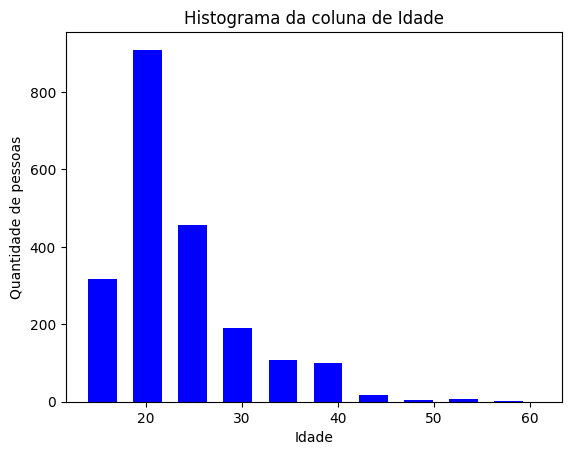

In [47]:
criar_histograma('Idade', 'blue', 3)

                                Conclusão do histograma das idades
A maioria das pessoas que fazem parte da pesquisa posuem entre 20 e 30 anos.

A minoria das pessoas das pessoas possuem mais que 50 anos e menos que 60 anos.

Podemos obeservar que a pesquisa é composta predominantemente por jovens

Histograma das alturas

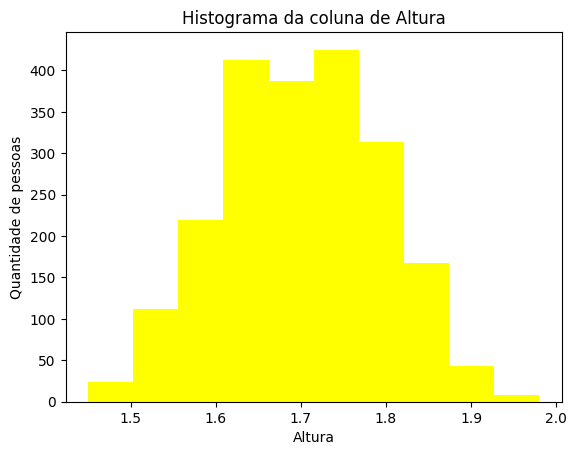

In [48]:
criar_histograma('Altura','yellow')

                                                            Conclusão dos histograma de altura
-> A maioria das pessoas estão concentradas na faixa dos 1.6 a 1.8
-> A minoria das pessoas estão concentradas na dos 1.9 a 2.0.
-> A quantidade de pessoas que possuem 1.9 de altura é maior 
que a quantidade de pessoas que possuem 1.5 de altura.
-> O grupo das pessoas na faixa dos 1.7 a 1.8 ultrapassa dos 400 
integrantes

Histograma dos pesos

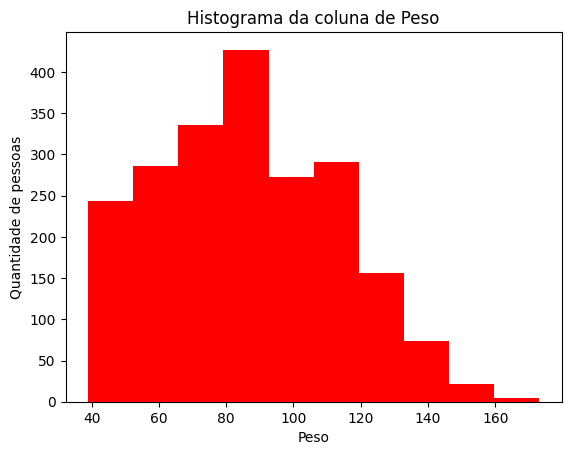

In [49]:
criar_histograma('Peso', 'red')

                                                                     Conclusão do histograma de pesos
-> Boa parte das pessoas possuem o peso na faixa dos 60 e 80 kilos

-> A minoria das pessoas possuem mais de 160 kilos

-> Podemos observar que a faixa dos 120 e 160 são menores que as demais
faixas



 Histogramas das pessoas que comem vegetais nas refeições

Como estamos lidando com quantidade de vegetais, talvez o formato de inteiros
seja o mais adequado.

In [50]:
# Conversão de float para inteiro: Primeiro vamos acessar a coluna
# de quantidade de vegetais. Depois, o astype irá converter todos os valores
# de float para int. A função irá receber conmo parametro
colunas_numericas['Come_vegetais_nas_refeiçoes'] = colunas_numericas['Come_vegetais_nas_refeiçoes'].astype(int)

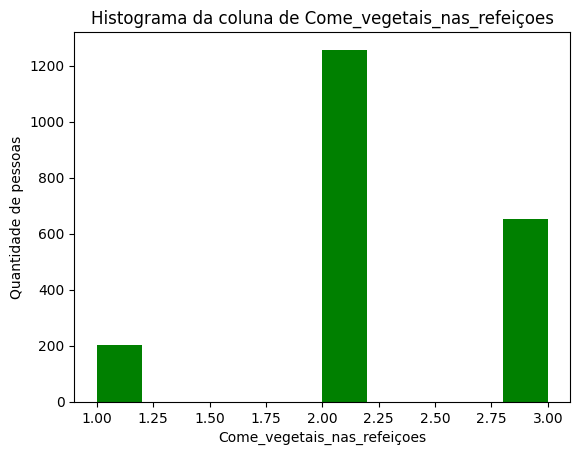

In [51]:
criar_histograma('Come_vegetais_nas_refeiçoes', 'green')

Antes de análisar a conclusão vamos verificar a quantidade de vegetais que cada pessoa
consumiu

In [52]:
colunas_numericas['Come_vegetais_nas_refeiçoes'].value_counts()

Come_vegetais_nas_refeiçoes
2    1257
3     652
1     202
Name: count, dtype: int64

Agora, vamos criar uma função para calcular a porcentagem de pessoas
que consumiram uma determinada quantidade de vegetais (no caso, a porcentagem
que consumiu vegetais 1, 2 ou 3 vezes)

In [53]:
# Função que irá calcular a porcentagem de pessoas que consomem algo
# ou realizam determinada ação. A função ira receber como parametro
# a base de dados análisada, a coluna que queremos e o valor que 
# que queremos calcular.
def calc_porcentagem_pessoas(base_dados, coluna, valor):
    
    # Ira filtrar os valores diferentes 0, pois, eles não devem
    # entrar na contagem (principalmente quando convertemos as 
    # colunas de float para inteiro)
    valores_diferentes_de_0 = base_dados[coluna] != 0
    
    # Ira receber o total de colunas diferentes de 0
    total_pessoas = valores_diferentes_de_0.sum()
    
    # Cálculo da porcentagem
    porcentagem = (valor / total_pessoas) * 100
    
    # Impressão dos resultados.
    print('Das ', total_pessoas, ' entrevistadas,', round(porcentagem,2),'%',' das pessoas consomem essa quantidade')

In [54]:
# Chamada da função
calc_porcentagem_pessoas(colunas_numericas,'Come_vegetais_nas_refeiçoes', 1257)

Das  2111  entrevistadas, 59.55 %  das pessoas consomem essa quantidade


                                                                    Conclusão do histograma de quantidade de vegetais
-> Dos 2116 entrevistados,a maioria das pessoas (59.55%) comem 2 vezes vegetais nas refeições

-> A minoria das pessoas (9.57%) comem vegetais apenas 1 vez

-> uma quantidade consideravel de pessoas (30.89%) comem vegetais 3 vezes em suas refeições

Histograma da quantidade de refeições principais

Como nesse caso também vamos falar de quantidade, precisamos converter para inteiro

In [55]:
# Vamos selecionar a coluna que queremos trabalhar e converter os valores
# para inteiro usando o astype
colunas_numericas['Quant_refeiçoes_principais'] = colunas_numericas['Quant_refeiçoes_principais'].astype(int)

Analisando a quantidade de pessoas de maneira mais exata

In [56]:
colunas_numericas['Quant_refeiçoes_principais'].value_counts()

Quant_refeiçoes_principais
3    1362
1     395
2     285
4      69
Name: count, dtype: int64

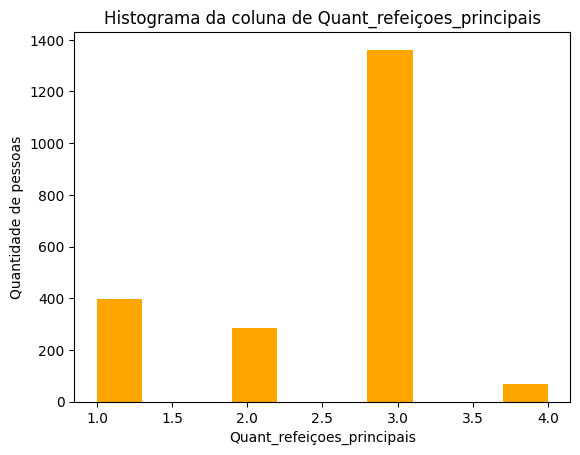

In [57]:
criar_histograma('Quant_refeiçoes_principais', 'orange')

Para aprimorar a nossa análise vamos chamar a função de cálculo de porcentagens

In [58]:
calc_porcentagem_pessoas(colunas_numericas,'Quant_refeiçoes_principais',  69)

Das  2111  entrevistadas, 3.27 %  das pessoas consomem essa quantidade


                                                               Conclusão do histograma de quantidade de refeições principais
-> A maioria dos entrevistados (64,52%) fazem 3 refeições por dia

-> Em segundo lugar, temos o grupo que faz apenas 1 refeição por dia.
Esse grupo representa 18,71% dos entrevistados.

-> No grupo das pessoas que fazem apenas 2 refeições por dia, temos
13,5% dos entrevistados

-> Já a minoria dos entrevistados (3,27%) fazem 4 refeiçoes por dia.

Histograma da quantidade de refeições principais

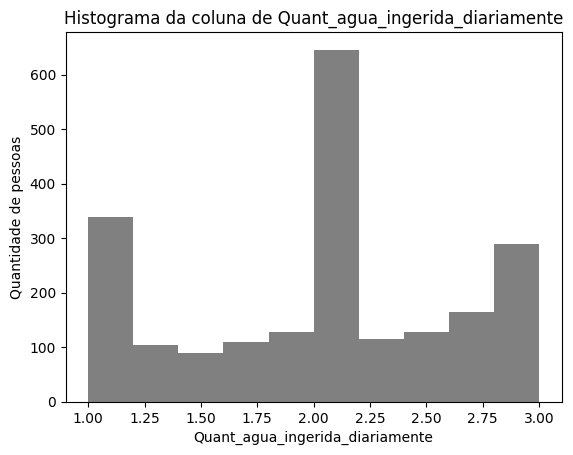

In [59]:
criar_histograma('Quant_agua_ingerida_diariamente', 'gray')

Visualizando os numeros com mais precisão: Para facilitar a nossa análise vamos verificar os valores usando o value counts com o intuito de tornar
a nossa análise mais assertiva

In [60]:
colunas_numericas['Quant_agua_ingerida_diariamente'].value_counts()

Quant_agua_ingerida_diariamente
2.000000    448
1.000000    211
3.000000    162
1.636326      3
2.825629      3
           ... 
2.722276      1
2.634342      1
2.619390      1
2.786780      1
2.863513      1
Name: count, Length: 1268, dtype: int64

Chamando a função de cálculo de percentuais de pessoas

In [61]:
calc_porcentagem_pessoas(colunas_numericas, 'Quant_agua_ingerida_diariamente', 162)

Das  2111  entrevistadas, 7.67 %  das pessoas consomem essa quantidade


                Conclusão do histograma de quantidade de água ingerida
-> A maioria dos entrevistados (21,22%) consomem 2 litros de água por dia

-> Em segundo lugar temos o grupo que ingere apenas 1 litro de água por
dia (10% das pessoas)

-> Ja á minoria das pessoas(7,67% das pessoas) consomem 3 litros de água por dia

-> Nessa análise foram consideradas os totais de pessoas de cada faixa ou seja, a quantidade total de pessoas que ingerem 1, 2 ou 3 litros de água 
por dia


Histograma das frequências de atividades fisicas

Como a frequência de atividade fisica se refere a quantidade de vezes que uma
pessoa prática exercicios fisicos ou vai á academia, precisamos converter esses valores de float para inteiros

In [62]:
# Priemeiro vamos selecionar a coluna que queremos converter e depois usarameos a função astype
# para converter todos os valores da coluna para inteiro
colunas_numericas['Frequencia_de_atividade_fisica'] = colunas_numericas['Frequencia_de_atividade_fisica'].astype(int)

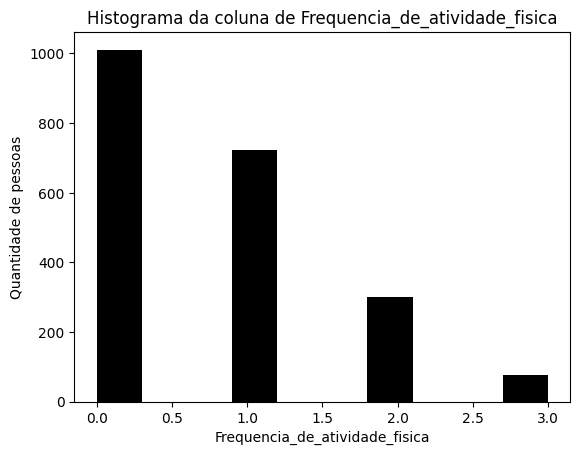

In [63]:
criar_histograma('Frequencia_de_atividade_fisica','black')

Verificando os valores com mais precisão

In [64]:
colunas_numericas['Frequencia_de_atividade_fisica'].value_counts()

Frequencia_de_atividade_fisica
0    1011
1     724
2     301
3      75
Name: count, dtype: int64

Como nesse caso temos a contagem de pessoas que não praticam exercicios fisicos, vamos calcular manualmente a porcentagem de cada categoria, pois,
a nossa função de calculos percentuais de pessoas filtra valores diferentes
de 0.

In [65]:
total_pessoas = colunas_numericas['Frequencia_de_atividade_fisica'].sum()

nao_praticam_exercicio = (1011 / total_pessoas) * 100

praticam_1_vez = (724 / total_pessoas) * 100

praticam_2_vezes = (301 / total_pessoas) * 100  

praticam_3_vezes = (75 / total_pessoas) * 100

print('Porcentagem de pessoas que não praticam exercicios: ', round(nao_praticam_exercicio,2))

print('Porcentagem de pesssoas que praticam apenas 1 vez: ', round(praticam_1_vez, 2))

print('Porcentagem de pesssoas que praticam 2 vezes: ', round(praticam_2_vezes, 2))

print('Porcentagem de pessoas que praticam 3 vezes: ', round(praticam_3_vezes, 2))

Porcentagem de pessoas que não praticam exercicios:  65.18
Porcentagem de pesssoas que praticam apenas 1 vez:  46.68
Porcentagem de pesssoas que praticam 2 vezes:  19.41
Porcentagem de pessoas que praticam 3 vezes:  4.84


                                                               Conclusão do histograma de frequências de atividades fisicas
-> 65.18%% das pessoas não praticam atividades fisicas, que no caso desse histograma,
é a maioria das pessoas.

-> Das pessoas que praticam exercicios, 46.68% (que é a maioria do grupo dos que praticam 
exercicios) fazem exercicios 1 vez por semana.

-> 19,41% das pessoas fazem exercicios 2 vezes por semana.

-> Do grupo que pratica exercicios mais vezes durante a semana, apenas 4.84% das pessoas
fazem exercicios 3 vezes por dia, que é a minoria das pessoas entrevistadas.

histograma do tempo em dispositivos eletrônicos

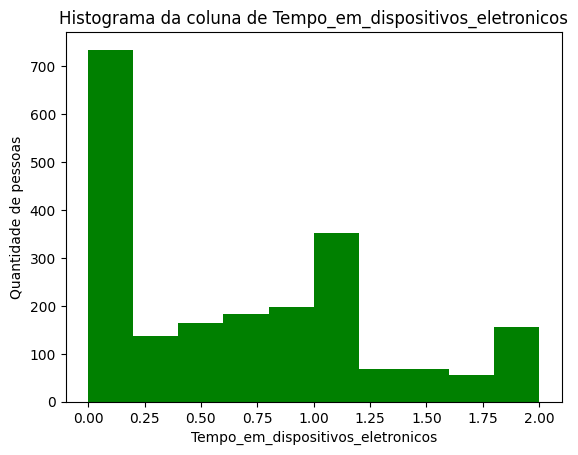

In [66]:
criar_histograma('Tempo_em_dispositivos_eletronicos','green')

Visualizando os valores com mais precisão

In [67]:
colunas_numericas['Tempo_em_dispositivos_eletronicos'].value_counts()

Tempo_em_dispositivos_eletronicos
0.000000    557
1.000000    292
2.000000    109
0.630866      4
1.119877      3
           ... 
0.091711      1
0.178301      1
0.171034      1
0.097760      1
0.813235      1
Name: count, Length: 1129, dtype: int64

Vamos novamente fazer manualmente já que nesse caso também consideramos quem também não
utiliza dispositivos eletrônicos. Nesse caso também vamos considerar na análise, apenas
o total que é formado pelas faixas de tempo que representam as categorias 0 (não utilizam
dispositivos eletronicos), 1 hora, 2 horas.

In [68]:
total_pessoas = colunas_numericas['Tempo_em_dispositivos_eletronicos'].sum()

nao_utilzam = (557 / total_pessoas) * 100

utilizam_1_hora = (292 / total_pessoas) * 100

utilizam_2_horas = (109 / total_pessoas) * 100

print('Porcentagem das pessoas que não utilizam dispositivos eletrônicos: ', round(nao_utilzam, 2))

print('Porcentagem das pessoas que utilizam dispositivos eletrônicos por 1 hora: ', round(utilizam_1_hora, 2))

print('Porcentagem das pessoas que utilzam dispositivos eletrônicos durante 2 horas: ', round(utilizam_2_horas, 2))

print('Total de entrevistados: ', round(total_pessoas, 2))

Porcentagem das pessoas que não utilizam dispositivos eletrônicos:  40.11
Porcentagem das pessoas que utilizam dispositivos eletrônicos por 1 hora:  21.03
Porcentagem das pessoas que utilzam dispositivos eletrônicos durante 2 horas:  7.85
Total de entrevistados:  1388.75


                                                       Conclusão do histograma de tempo em dispositivos eletrônicos
-> A maioria das pessoas (40,11 %) não utilizam dispositivos eletrônicos

-> Do grupo que utiliza dispositivos eletrônicos, a maioria utiliza por 
apenas 1 hora, sendo 21,03% das pessoas

-> Ja a minoria dos entrevistados utilizam dispositivos eletrônicos por 2 horas.

-> Vale lembrar que utilizamos o total de cada faixa de horário no calculo das
porcentagens

Boxplot: Identifcar outliers e comparar a distribuição de variáveis 
numéricas entre grupos (por exemplo, homens e mulheres).

A minha idéia é criar uma função que cria subplots que irá colocar 
2 boxplots um do lado do outro para verificarmos a distribuição dos
dados entre os grupos de variáveis numéricas.

In [69]:

# Função que irá criar os subplots de boxplot: A função ira receber
# como argumento o nome das colunas que serão analisadas no subplot
def criar_boxplot(coluna1, coluna2 ):
    
    # Ira definir o tamanho da imagem que ira conter os 2 boxplots
    plt.figure(figsize=(15,6))
    
    # Os nossos subplots irão ter 1 linha 2 e colunas
    
    # O primeiro subplot irá ocupar o 1° espaço (que está sendo representado
    #  pelo último valor da função)
    plt.subplot(1,2,1)
    
    # Ira definir o titulo do gráfico alinhado a esquerda e com tamanho da fonte 14
    # o name serve para capturar o nome da 1° coluna
    plt.title(f'Boxplot da coluna {colunas_numericas[coluna1].name}', fontsize=14, loc='center')

    # Ira definir o rótulo do eixo usando o nome da 1° coluna
    plt.xlabel(colunas_numericas[coluna1].name)
    
    # função que irá criar o boxplot: A função receberá como argumento
    # a base de dados analisada e a 1° coluna como valor do eixo X.
    sns.boxplot(data=colunas_numericas, x=coluna1)
    
    # O segundo subplot irá ocupar o 2° espaço da imagem
    plt.subplot(1,2, 2)
    
     # Ira definir o titulo do gráfico alinhado a esquerda e com tamanho da fonte 14
     # O name serve para capturar o nome da 2° coluna
    plt.title(f'Boxplot da coluna {colunas_numericas[coluna2].name}', fontsize=14, loc='center')
    
    # Ira definir o rótulo do eixo usando o nome da 2° coluna
    plt.xlabel(colunas_numericas[coluna2].name)
    
    # função que irá criar o boxplot: A função receberá como argumento
    # a base de dados analisada e a 2° coluna como valor do eixo X.
    sns.boxplot(data=colunas_numericas, x=coluna2)
    
    # Ira exibir os gráficos
    plt.show()
    
    
    

Boxplot de frequencia de atividades fisicas e quantidade de águas 
ingeridas

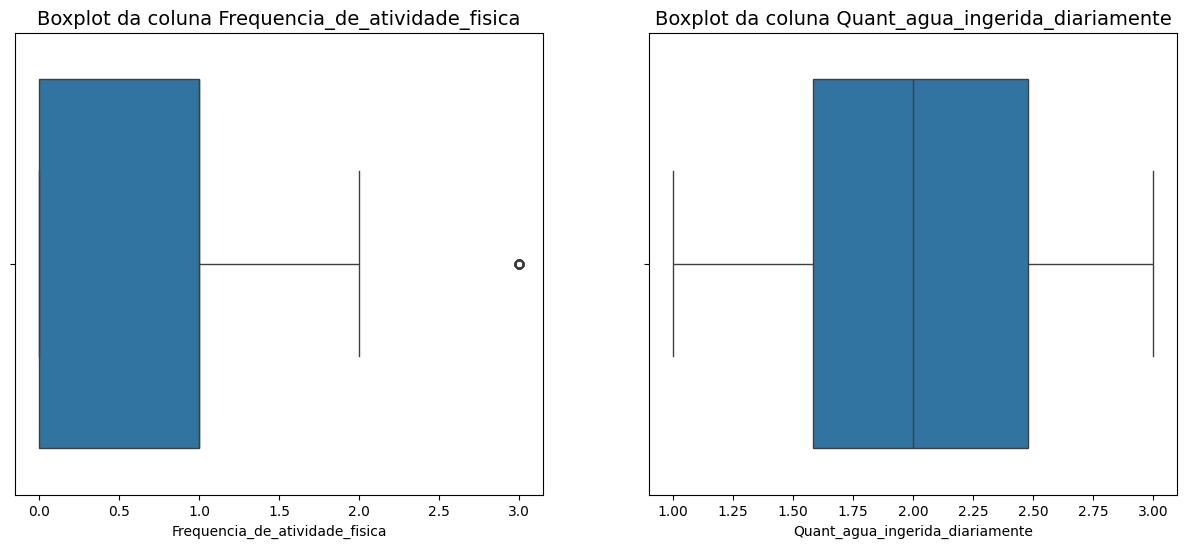

In [70]:

criar_boxplot('Frequencia_de_atividade_fisica', 'Quant_agua_ingerida_diariamente')

Como a coluna de atividades fisícas é do tipo inteiro, o boxplot teve 
dificuldades em traçar a linha da mediana, então, resolvi chamar a
função de imprimirValores para descobrir a mediana da coluna.

In [71]:
imprimirValores('Frequencia_de_atividade_fisica')

Média dos valores da coluna de  Frequencia_de_atividade_fisica :  1.01
Mediana dos valores da coluna de  Frequencia_de_atividade_fisica :  1.0
Moda dos valores da coluna de  Frequencia_de_atividade_fisica :  0    0.0
Name: Frequencia_de_atividade_fisica, dtype: float64


                            Conclusão do boxplot
-> O boxplot de atividades fisicas indica que o menor valor da coluna é 0
(pessoas que não praticam atividade fisica) e o maior valor é 2 (pessoas
que praticam exercicios fisicos 2 vezes na semana).

-> O boxplot de atividades fisicas tem o valor 1 como mediana. Há poucos 
 outliers (valor fora do padrão) no 3 (que é a minoria das pessoas,
 que como verificamos anteriormente, praticam exercicios fisicos 3
 vezes na semana ).

 -> O boxplot de quantidade de água ingerida indica que o menor valor
 da coluna é 1 (litro) e o maior valor é 3 (litros)

 -> A mediana da coluna de aguas ingeridas é de 2 litros e não
 há valores fora do pradrão, ou seja, não há outliers.

 -> A parte das distribuições está balanceada, ou seja, eles possuem
 quase os mesmos numeros de pessoas, porém, a coluna sobre a quantidade
 de águas ingeridas possui um pouco mais de pessoas. É possivel observar
 a diferença se percebemos que o primeiro boxplot vai de 0 a 1 e o segundo
 vai de 1.50 a 2.50

Boxplot do consumo de vegetais e peso

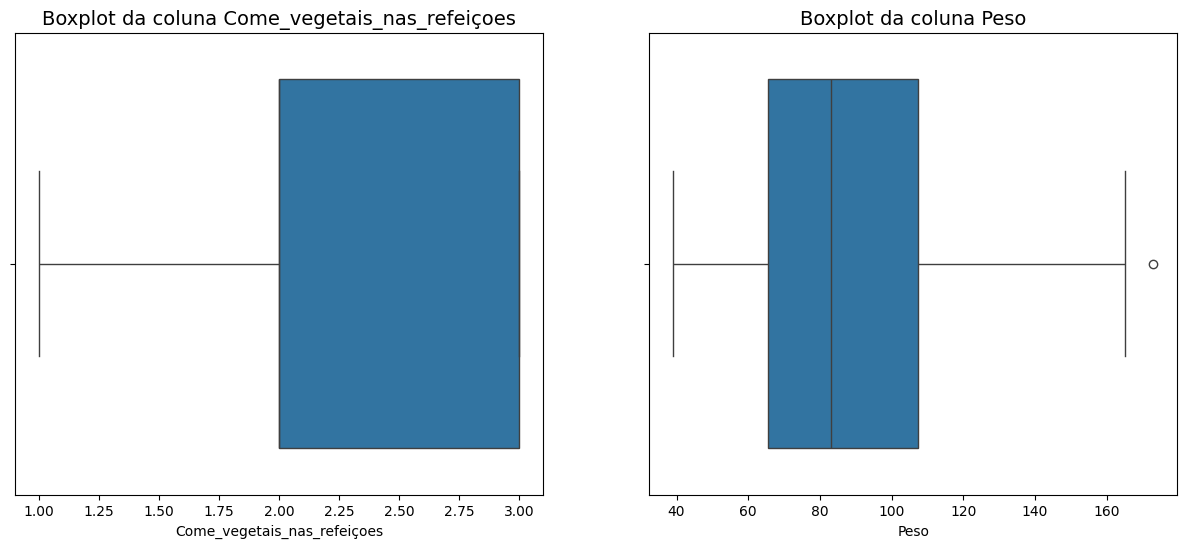

In [72]:
criar_boxplot('Come_vegetais_nas_refeiçoes', 'Peso')

Como a coluna de consumo vegetais é do tipo inteiro vamos usar a coluna de imprimir valores para 
verificar de forma exata a mediana. Como falamos anteriormente o o boxplot tem dificuldades em
traçar a linha da mediana das colunas de tipo inteiro

In [73]:
imprimirValores('Come_vegetais_nas_refeiçoes')

Média dos valores da coluna de  Come_vegetais_nas_refeiçoes :  2.42
Mediana dos valores da coluna de  Come_vegetais_nas_refeiçoes :  2.39
Moda dos valores da coluna de  Come_vegetais_nas_refeiçoes :  0    3.0
Name: Come_vegetais_nas_refeiçoes, dtype: float64


Como a linha da mediana do boxplot de peso está um pouco ácima do 80, também vamos usar
a função imprimirValores para ver o valor de forma exata

In [74]:
imprimirValores('Peso')

Média dos valores da coluna de  Peso :  86.59
Mediana dos valores da coluna de  Peso :  83.0
Moda dos valores da coluna de  Peso :  0    80.0
Name: Peso, dtype: float64


          Conclusão do boxplot
-> o boxplot de quantidade de vegetais indica que o maior valor de vegetais
consumidom é o 3 e o menor valor é o 1. A mediana da coluna de vegetais é 2.39.

-> Não há outliers na coluna de quantidade de vegetais, o que indica que os 
valores estão bem distribuidos nessa coluna.

-> O menor valor da coluna de peso é 40 e o maior valor é o 160. O valor
da mediana, ou seja, o valor que divide os em 50% é o 83.

-> Podemos observar que há pequenos outliers que se encontram acima do maior
valor, 0 160 (que representam uma minoria de pessoas que possuem peso superior a 160), entretanto, ainda podemos considerar que a coluna de peso é bem
distribuida.

-> Concluindo: se formos comaparar, ambas variaveis estão bem distribuidas,
mas, vale lembrar que a coluna de peso possui uma pequena assimetria, representada pelos outliers.

Assimetria: Se refere a falta de simetria em uma distribuição de dados.
Imagine um gráfico de barras: se ele for perfeitamente simétrico, 
significará que há mais valores concentrados em uma determinada região
do gráfico e menos em outra.

Gráficos de barras: Verificar a frequência de categorias para variáveis categóricas

Primeiro, Vamos visualizar as colunas categóricas para facilitar o nosso processo de análise

In [75]:
colunas_categoricas.columns

Index(['Genero', 'Historico_Familiar', 'Frequencia_em_alimentos_caloricos',
       'Come_algo_entre_as_refeiçoes', 'Fuma', 'Monitora_calorias_diariamente',
       'Frequencia_que_ingere_alcool', 'Transporte_utilizado',
       'Nivel_Obesidade'],
      dtype='object')

Nesse caso não irei criar uma função, pois, cada coluna terá uma quantidade diferente de
valores únicos, ou seja, cada gráfico terá as suas particularidades em sua construção

Grafico de barras da coluna de gênero

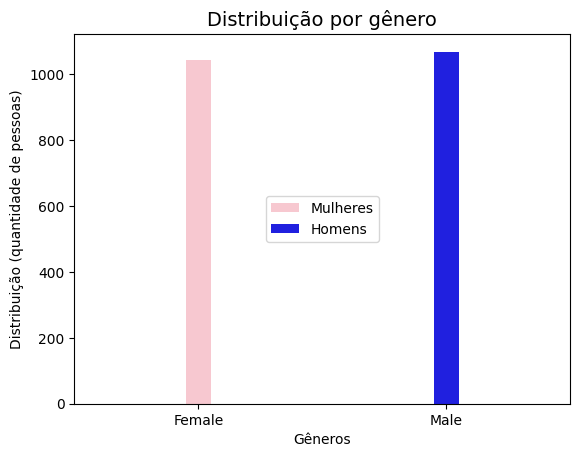

In [76]:
# Ira definir o titulo do gráfico
plt.title('Distribuição por gênero', fontsize=14, loc='center')

# Ira definir o rótulo do eixo x
plt.xlabel('Gêneros')

# Ira definir o rótulo do eixo y
plt.ylabel('Distribuição (quantidade de pessoas)')

# O countplot é uma função da biblioteca seaborn que permite visualizar
# a contagem de observações para cada categoria de uma variável categórica.
# Em outras palavras ele cria um gráfico de barras que representa a frequência de uma determinada categoria.
sns.countplot(data=colunas_categoricas, x='Genero', palette=['pink', 'blue'], width=0.1)

# Irá definir a legenda do gráfico
plt.legend(labels=['Mulheres', 'Homens'], loc='center')

# Ira exibir o gráfico 
plt.show()

Vamos usar o value_counts para visulizar os valores exatos

In [77]:
colunas_categoricas['Genero'].value_counts()

Genero
Male      1068
Female    1043
Name: count, dtype: int64

Chamando a função de calculo de porcentagens

In [78]:
calc_diferenca_percentual(1068, 1043)

2.3969319271332696

Conclusão do gráfico de distribuição de gêneros:

-> É possivel notar pelo gráfico que a distribuição está bem equilibrada

->É possivel notar que há mais homens do que mulheres, onde o grupo dos 
 homens é 2,39% maior que o grupo das mulheres.

Gráfico de barras da coluna de históricos familiar

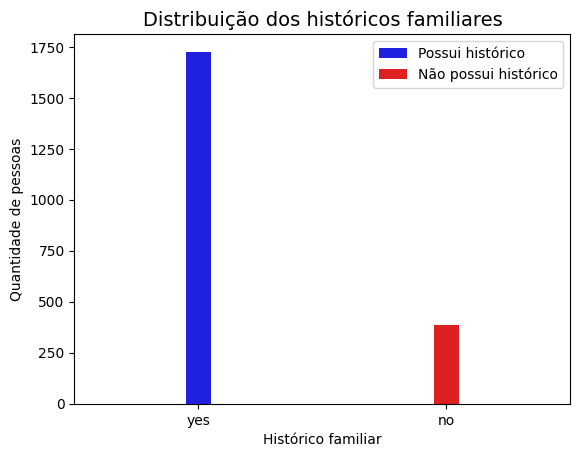

In [79]:
# Titulo do gráfico alinhado no centro e com tamanho da fonte 14
plt.title('Distribuição dos históricos familiares', fontsize=14, loc='center')

# Titulo do eixo x
plt.xlabel('Histórico familiar')

# Titulo do eixo x
plt.ylabel('Quantidade de pessoas')

# Função da biblioteca seaborn que conta a frequencia (observações de cada categoria) de uma coluna.
# A função irá receber como parâmetro a base de dados análisada, os valores do eixo x, a largura da 
# barra e a paleta de cores
sns.countplot(data=colunas_categoricas, x='Historico_Familiar' , width=0.1, palette=['blue', 'red'])

# Função que irá criar a legenda do gráfico: A função irá receber como paramêtro
# um labels que ira definir o titulo de cada categoria e um loc que irá definir
# a posição da legenda no gráfico.
plt.legend(labels=['Possui histórico', 'Não possui histórico'],loc='upper right')
plt.show()

Usando o value_counts para visualizar os valores de forma mais exata

In [80]:
colunas_categoricas['Historico_Familiar'].value_counts()

Historico_Familiar
yes    1726
no      385
Name: count, dtype: int64

Chamando a função de diferenças percentuais

In [81]:
calc_diferenca_percentual(1726, 385)

348.31168831168833

Chamada da função de calculos percentuais

In [82]:
calc_porcentagem_pessoas(colunas_categoricas, 'Historico_Familiar', 385)

Das  2111  entrevistadas, 18.24 %  das pessoas consomem essa quantidade


Conclusão do gráfico de barras dos históricos familiares:

-> É possivel notar que a quantidade de pessoas com histórico familiares de
obesidade (81,76% dos entrevistados) é muito maior do que as pessoas que não possuem um histórico de 
obesidade(18,24% dos entrevistados).

-> Podemos observar que o grupo de pessoas que possuem o historico de obesidade
´348% maior que o grupo que não possui históricos de obesidade

Gráfico de barras da frequência em alimentos calóricos

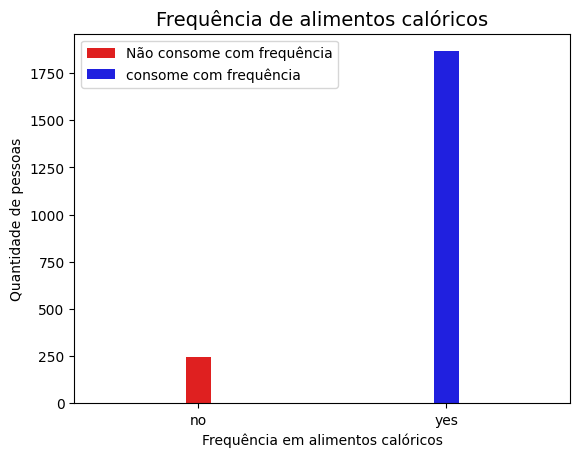

In [83]:

# Titulo do gráfico alinhado ao centro e com tamanho da fonte 14
plt.title('Frequência de alimentos calóricos', loc='center', fontsize=14)

# Titulo do eixo x
plt.xlabel('Frequência em alimentos calóricos')

# Titulo do eixo Y
plt.ylabel('Quantidade de pessoas')

# Função do seaborn que constrói um gráfico de barras com as frequências (observações) de cada categoria
# da coluna. A função ira receber como parametro a a base de dados analisada,  a largura das barras e a
# paleta de cores que será utilizada nas barras
sns.countplot(data=colunas_categoricas, x='Frequencia_em_alimentos_caloricos', width=0.1, palette=['red', 'blue'])

# Função do matplotlib que irá criar a legenda do gráfico. A função ira receber como parâmetro
# o labels com os titulos das categorias na legenda e o loc que irá definir a posição da legenda
# no gráfico.
plt.legend(labels=['Não consome com frequência', 'consome com frequência'], loc = 'upper left')

# Irá exibir o gráfico
plt.show()



Analisando os valores com mais precisão

In [84]:
colunas_categoricas['Frequencia_em_alimentos_caloricos'].value_counts()

Frequencia_em_alimentos_caloricos
yes    1866
no      245
Name: count, dtype: int64

Calculando a diferença percentual

In [85]:
calc_diferenca_percentual(1866, 245)

661.6326530612245

Chamada da função de cálculos percentuais

In [86]:
calc_porcentagem_pessoas(colunas_categoricas, 'Frequencia_em_alimentos_caloricos', 245)

Das  2111  entrevistadas, 11.61 %  das pessoas consomem essa quantidade


Conclusão do gráfico de barras de frequência de calorias:

-> Podemos observar no gráfico que a quantidade de pessoas que consomem
com frequência (88,39% dos entrevistados) é extremamente maior que o grupo que não consomem calorias
com frequência(11,61% dos entrevistados).

-> O grupo que consomem calorias com frequência é 661% maior que o grupo de pessoas que não consomem calorias frequentemente.

Gráfico de barras da coluna de pessoas que comem algo durante as refeições.

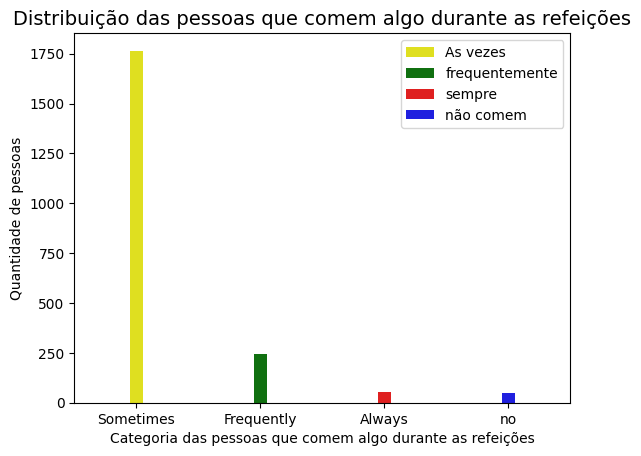

In [87]:

# Titulo do gráfico alinhado ao centro e com tamanho da fonte 14.
plt.title('Distribuição das pessoas que comem algo durante as refeições', loc='center', fontsize=14)

# Titulo do eixo x
plt.xlabel('Categoria das pessoas que comem algo durante as refeições')

# Titulo do eixo Y
plt.ylabel('Quantidade de pessoas')

# Função da biblioteca seaborn que ira criar um gráfico de barras com as frequências de cada categoria
# da coluna. A função ira receber como parametro a base de dados análisada, os valores do eixo x, a 
# largura das barras e a paleta de cores das barras do gráfico. 
sns.countplot(data=colunas_categoricas, x='Come_algo_entre_as_refeiçoes', width=0.1, palette=['yellow', 'green', 'red', 'blue'])

# Função do matplotlib que ira criar a legenda do gráfico. A função irá ter como parametro,
# o labels que ira definir o titulo das categorias na legenda e o loc que irá definir a posiçaõ
# da legenda no gráfico
plt.legend(labels=['As vezes', 'frequentemente', 'sempre', 'não comem'], loc='upper right')

plt.show()

Visualizando os dados com mais precisão

In [88]:
colunas_categoricas['Come_algo_entre_as_refeiçoes'].value_counts()

Come_algo_entre_as_refeiçoes
Sometimes     1765
Frequently     242
Always          53
no              51
Name: count, dtype: int64

Calculando a diferença percentual

In [89]:
calc_diferenca_percentual(53, 51)

3.9215686274509802

Chamada da função de cálculos percentuais

In [90]:
calc_porcentagem_pessoas(colunas_categoricas, 'Come_algo_entre_as_refeiçoes', 242)

Das  2111  entrevistadas, 11.46 %  das pessoas consomem essa quantidade


Conclusão do grafico de barras das pessoas que comem algo entre as refeições:

-> A maioria das pessoas as vezes consomem algo entre as refeições (83,16%
dos entrevistados).

-> A minoria das pessoas não consomem algo entre as refeições (2,42%
dos entrevistados)

-> O grupo de pessoas que consomem algo frequentemente é o 2° maior
grupo das categorias (11,46% dos entrevistados).

->A diferença percentual entre o grupo always (sempre consomem) e o grupo no(não consomem) é de apenas 3,9%, ou seja, é uma diferença relativamente pequena.

Grafico de barras da frequência de pessoas que fumam

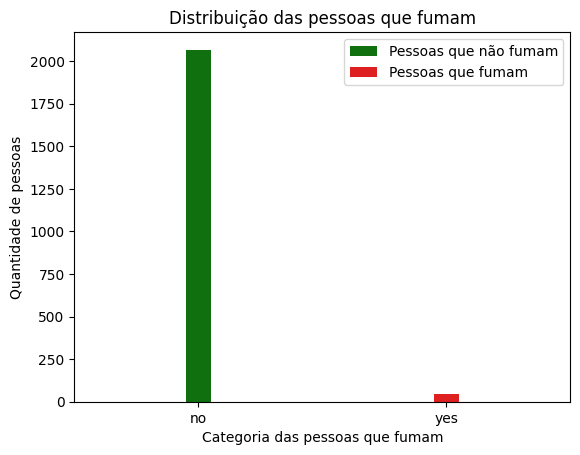

In [91]:

# Titulo do grafico alinhado ao centro e com tamanho da fonte 12
plt.title('Distribuição das pessoas que fumam', loc='center', fontsize=12)

# Titulo do eixo X
plt.xlabel('Categoria das pessoas que fumam')

# Titulo do eixo Y
plt.ylabel('Quantidade de pessoas')

# Função da biblioteca seaborn que irá construir um gráfico de barras com a frequência
# (observações) de cada categoria da coluna. A função irá receber como parametro a
# base de dados utilizada, os valores do eixo x, a largura e a paleta de cores das 
# barras do gráfico
sns.countplot(data=colunas_categoricas, x='Fuma', width=0.1, palette=['green', 'red'])

# Função do matplotlib que irá criar as legendas do gráfico. A função ira receber
# como parametro o labels (que ira definir o titulo de cada categoria na legenda)
# e o loc( que ira definir a posição da legenda no gráfico)
plt.legend(labels=['Pessoas que não fumam', 'Pessoas que fumam'], loc='upper right')

# Ira exibir o grafico
plt.show()

Visualizando os valores com mais frequência

In [92]:
colunas_categoricas['Fuma'].value_counts()

Fuma
no     2067
yes      44
Name: count, dtype: int64

Chamando a função de diferença percentual

In [93]:
calc_diferenca_percentual(2067, 44)

4597.727272727273

Chamando a função de calculo percentual de pessoas

In [94]:
calc_porcentagem_pessoas(colunas_categoricas, 'Fuma', 2067)

Das  2111  entrevistadas, 97.92 %  das pessoas consomem essa quantidade


conclusão do grafico de barras de pessoas que fumam:

-> A maioria das pessoas não fumam.

-> A minoria das pessoas fumam.

-> O grupo de não fumantes é 4597,7% maior que o grupo de fumantes

-> 2,08% das pessoas entrevistadas fumam

-> 97,92% das pessoas entrevistadas não fumam.

Grafico de barras com a frequência de pessoas que monitoram a suas calorias diariamente

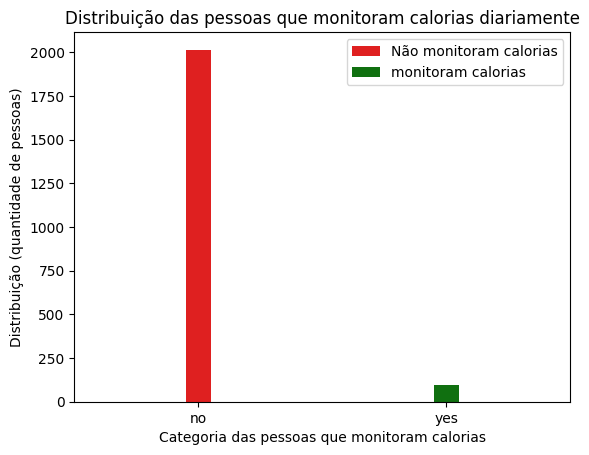

In [95]:
# Irá definir o titulo do gráfico
plt.title('Distribuição das pessoas que monitoram calorias diariamente', loc='center', fontsize=12)

# Irá definir o titulo do eixo X
plt.xlabel ('Categoria das pessoas que monitoram calorias')

# Irá definir o titulo do eixo Y.
plt.ylabel('Distribuição (quantidade de pessoas)')

# Função da biblioteca seaborn que irá criar um grafico de barras com as frequências (observações) de cada categoria
# da coluna. A função irá receber como parametro a base de dados, os valores do eixo x, a largura e a paleta de cores
# das barras do gráfico
sns.countplot(data=colunas_categoricas, x='Monitora_calorias_diariamente', width=0.1, palette=['red', 'green'])

# Função da biblioteca matplotlib que irá criar as legendas do gráfico. A função irá receber como 
# parametro o labels (que irá definir os titulos de cada categoria na legenda) e o loc(que irá
# definir a posição da legenda no gráfico)
plt.legend(labels=['Não monitoram calorias', 'monitoram calorias'], loc='upper right')

plt.show()

Visualizando os dados com mais precisão

In [96]:
colunas_categoricas['Monitora_calorias_diariamente'].value_counts()

Monitora_calorias_diariamente
no     2015
yes      96
Name: count, dtype: int64

Chamando a função de cálculos de diferenças percentuais

In [97]:
calc_diferenca_percentual(2015, 96)

1998.9583333333333

Chamando a função de calculos percentuais

In [98]:
calc_porcentagem_pessoas(colunas_categoricas, 'Monitora_calorias_diariamente', 96)

Das  2111  entrevistadas, 4.55 %  das pessoas consomem essa quantidade


Conclusão do gráfico de barras de pessoas que monitoram calorias

-> A maioria das pessoas não monitoram as suas calorias diariamente, sendo
95,45% dos entrevistados

-> A minoria dos entrevistados (4,55%) monitoram as suas calorias
diariamente.

-> O grupo de pessoas que não monitoram calorias é 1998,95% maior que 
o grupo que monitora as suas calorias diariamente.

Grafico de barras da frequência de pessoas que ingerem alcool diariamente

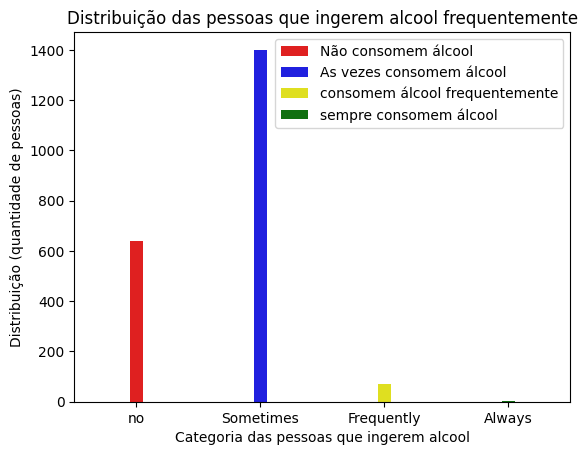

In [99]:
plt.title('Distribuição das pessoas que ingerem alcool frequentemente', loc='center', fontsize=12)

plt.xlabel('Categoria das pessoas que ingerem alcool')

plt.ylabel('Distribuição (quantidade de pessoas)')

sns.countplot(data=colunas_categoricas, x='Frequencia_que_ingere_alcool', width=0.1, palette=['red', 'blue', 'yellow', 'green'])

plt.legend(labels=['Não consomem álcool', 'As vezes consomem álcool', 'consomem álcool frequentemente', 'sempre consomem álcool'], loc='upper right')

plt.show()

Visualizando os dados com mais precisão

In [100]:
colunas_categoricas['Frequencia_que_ingere_alcool'].value_counts()

Frequencia_que_ingere_alcool
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64

Chamada da função de cálculos percentuais

In [101]:
calc_porcentagem_pessoas(colunas_categoricas, 'Frequencia_que_ingere_alcool', 70)

Das  2111  entrevistadas, 3.32 %  das pessoas consomem essa quantidade


Conclusão do grafico de barras da distribuição de pessoas que ingerem álcool

-> A maioria das pessoas, 66,37% dos entrevistados as vezes consomem álcool.

-> A minoria dos entrevistados, 0,05% sempre consomem bebidas álcoolicas.

-> O segundo maior grupo é o das pessoas que não consomem bebidas álcoolicas,
sendo 30,27% dos candidatos.

-> Apenas 3,32% dos entrevistados consomem álcool frequentemente.

Gráfico de barras com a frequência de transportes utilizados pelas pessoas.

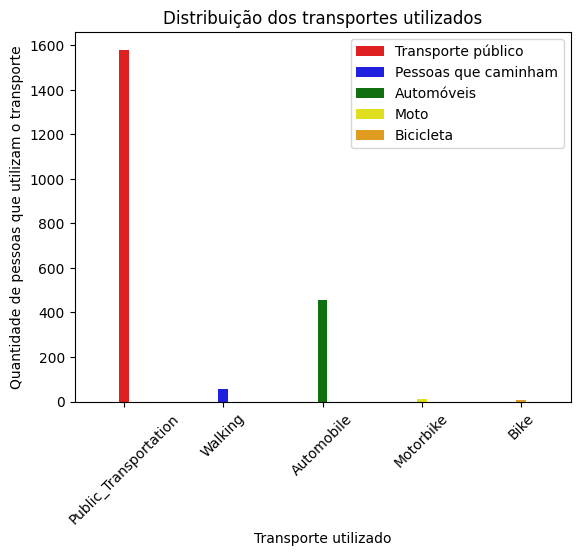

In [102]:
# Titulo do gráfico alinhado ao centro e com tamanho da fonte 12
plt.title('Distribuição dos transportes utilizados', loc='center', fontsize=12)

# Rótulo do eixo X
plt.xlabel('Transporte utilizado')

# Rótulo do eixo Y
plt.ylabel('Quantidade de pessoas que utilizam o transporte')

# Ira rotacionar os rótulos do eixo X em 45 graus para deixar
# os nomes na vertical
plt.xticks(rotation=45)

# Função da biblioteca seaborn que irá criar um gráfico de barras com as frequências (observações) de cada categoria. A função
# irá receber como parametro a base de dados análisada, a largura e a cor das barras do gráfico.
sns.countplot(data=colunas_categoricas, x='Transporte_utilizado', width=0.1, palette=['red', 'blue', 'green', 'yellow','orange'])

# Função do matplotlib que irá criar as legendas dos gráficos. A função irá receber como parâmetro o labels(que irá
# definir o titulo de cada categoria na legenda) e o loc(que irá definir a posição da legenda no gráfico).
plt.legend(labels=['Transporte público', 'Pessoas que caminham', 'Automóveis', 'Moto', 'Bicicleta'], loc='upper right')

# Exibição do gráfico
plt.show()

Visualizando os dados com mais precisão

In [103]:
colunas_categoricas['Transporte_utilizado'].value_counts()

Transporte_utilizado
Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: count, dtype: int64

Chamada da função de cálculos percentuais

In [104]:
calc_porcentagem_pessoas(colunas_categoricas,'Transporte_utilizado', 56)

Das  2111  entrevistadas, 2.65 %  das pessoas consomem essa quantidade


In [105]:
calc_diferenca_percentual(11, 7)

57.14285714285714

Chamada da função de calculo de diferenças percentuais

Conclusão do grafico de barras da frequência de transportes utilizados.

-> A maioria dos entrevistados, 74,85% utilizam o transporte público em seu dia-a-dia.

-> A minoria dos entrevistados, 0,33% utilizam a bicicleta como meio de locomoção.

-> O segundo maior grupo utilizam o automóvel como meio de locomoção. Esse grupo
representa 21,65% dos entrevistados.

->0,52% dos entrevistados utilizam moto

-> O grupo de pessoas que utilizam moto é 57,14% maior que o grupo que utiliza
bicicletas.

-> Apenas 2,65% dos entrevistados caminham em seu dia-a-dia.

Gráfico de barras da frequência de niveis de obesidade

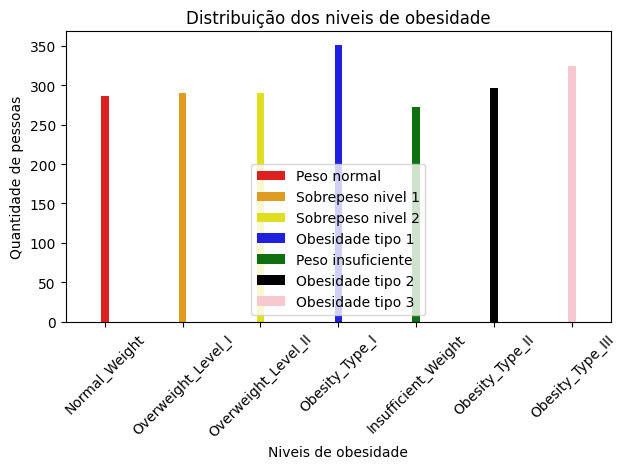

In [106]:

# Titulo do gráfico alinhado ao centro e com tamanho da fonte 12
plt.title('Distribuição dos niveis de obesidade', loc='center', fontsize=12)

# Rótulo do eixo X
plt.xlabel('Niveis de obesidade')

# Rótulos do eixo Y
plt.ylabel('Quantidade de pessoas')

# Ira deixar os rótulos do eixo x em 45 graus
# para deixa-los na vertical.
plt.xticks(rotation=45)

# Função que irá criar o gráfico de barras usando a frequência (observações) de cada categoria da coluna. A função terá
# como parametro a base de dados análisada, os valores do eixo x, a largura e a paleta de cores das barras.
sns.countplot(data=colunas_categoricas, x='Nivel_Obesidade', width=0.1, palette=['red', 'orange', 'yellow', 'blue', 'green', 'black', 'pink'])

# Função do matplotlib que irá definir a legenda do grafico. A função irá receber como parametro o labels
# (que irá definir os titulos de cada categoria) e loc (que irá definir a posição da legenda no gráfico). 
plt.legend(labels=['Peso normal', 'Sobrepeso nivel 1', 'Sobrepeso nivel 2','Obesidade tipo 1', 'Peso insuficiente',
                   'Obesidade tipo 2', 'Obesidade tipo 3'], loc='lower center')

plt.tight_layout()

plt.show()

Visualizando os dados com mais precisão

In [107]:
colunas_categoricas['Nivel_Obesidade'].value_counts()

Nivel_Obesidade
Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: count, dtype: int64

Chamada da função de cálculos percentuais

In [118]:
calc_porcentagem_pessoas(colunas_categoricas, 'Nivel_Obesidade', 287)

Das  2111  entrevistadas, 13.6 %  das pessoas consomem essa quantidade


Chamada da função de calculo de diferença percentual.

In [121]:
calc_diferenca_percentual(351, 272)

29.044117647058826

como 2 categorias tem a mesma quantidade de pessoas (por que as pessoas que possuem sobrepeso nivel 1 também possuem sobrepeso nivel 2), devemos considerar esse valor 2 vezes ao calcular a diferença percentual com outras categorias

In [122]:
# Irá calcular o total de pessoas que possuem sobrepeso 1 e 2
total_pessoas_com_sobrepeso = 290 +290

# Irá calcular a diferença entre o total de pessoas com sobrepeso 1 e 2 e as 
# pessoas com obesidade nivel 2
diferenca_entre_sobrepeso_e_obesidade_nivel_2 = total_pessoas_com_sobrepeso - 297

# Agora vamos pegar o valor da diferença para descobrirmos a porcentagem desse valor
# em relação ao total.
porcentagem_diferenca = (diferenca_entre_sobrepeso_e_obesidade_nivel_2 / 2111) * 100

# Impressão dos resultados
print('Diferença percentual entre sobrepeso 1 e 2 e obesidade nivel 2: ', porcentagem_diferenca)

Diferença percentual entre sobrepeso 1 e 2 e obesidade nivel 2:  13.405968735196588


Conclusão do gráfico de barras sobre nivel de obesidade:

-> A maioria dos entrevistados, 16,63%, possiem obesidade do tipo 1

-> A minoria dos entrevistados possuem peso insuficiente. Esse grupo
representa 12,88% dos entrevistados.

-> 15,35% dos entrevistados possuem obesidade do tipo 3

-> 14,07% dos entrevistados possuem obesidade do tipo 2.

-> 13,74% dos entrevistados possuem sobrepeso nivel 1 e sobrepeso nivel 2

-> 13.6% dos entrevistados possuem o peso normal.

-> O maior grupo (obesidade tipo 1) é apenas 29% maior que o menor grupo (o grupo
de pessoas que possuem pesos insuficientes).

-> A diferença entre o grupo que possuem sobrepeso nivel 1 e sobrepeso nivel 2  e o
grupo de obesidade nivel 2 também é pequeno, de apenas 13,40%